In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [ ]:
print(ratings.head())
print(movies.head())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
print(ratings.isnull().sum())
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [ ]:
ratings.dropna(inplace=True)
movies.dropna(inplace=True)

In [ ]:
merged_data = pd.merge(ratings, movies, on='movieId')
print(merged_data.head())

   userId  movieId  rating   timestamp  \
0       1       16     4.0  1217897793   
1       1       24     1.5  1217895807   
2       1       32     4.0  1217896246   
3       1       47     4.0  1217896556   
4       1       50     4.0  1217896523   

                                       title                   genres  
0                              Casino (1995)              Crime|Drama  
1                              Powder (1995)             Drama|Sci-Fi  
2  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  Mystery|Sci-Fi|Thriller  
3                Seven (a.k.a. Se7en) (1995)         Mystery|Thriller  
4                 Usual Suspects, The (1995)   Crime|Mystery|Thriller  


In [ ]:
user_movie_matrix = merged_data.pivot_table(index='userId', columns='title', values='rating')
print(user_movie_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Til There Was You (1997)  'burbs, The (1989)  \
userId                                                                          
1                          NaN                        NaN                 NaN   
2                          NaN                        NaN                 NaN   
3                          NaN                        NaN                 NaN   
4                          NaN                        NaN                 NaN   
5                          NaN                        NaN               

In [ ]:
user_movie_matrix.fillna(0, inplace=True)


In [ ]:
#user based
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
print(user_similarity_df.head())


ValueError: Input contains NaN.

In [ ]:
#item based
item_similarity = cosine_similarity(user_movie_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)
print(item_similarity_df.head())


title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      1.0   
'Hellboy': The Seeds of Creation (2004)         0.0   
'Round Midnight (1986)                          0.0   
'Til There Was You (1997)                       0.0   
'burbs, The (1989)                              0.0   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                                   0.0   
'Hellboy': The Seeds of Creation (2004)                                      1.0   
'Round Midnight (1986)                                                       0.0   
'Til There Was You (1997)                                                    0.0   
'burbs, The (1989)                                                           0.0   

title                    

In [ ]:
def predict_ratings(user_id, user_movie_matrix, similarity_matrix):
    similar_users = similarity_matrix[user_id]
    ratings = np.dot(similar_users, user_movie_matrix.fillna(0)) / np.array([np.abs(similar_users).sum()])
    return ratings


In [ ]:
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(predictions, targets):
    return np.sqrt(mean_squared_error(targets, predictions))


predictions = np.array([2.5, 3.0, 3.5, 4.0])
actuals = np.array([2.0, 3.2, 3.7, 4.2])

print("RMSE:", rmse(predictions, actuals))

RMSE: 0.3041381265149111


In [ ]:
def rmse(predictions, targets):
    return np.sqrt(mean_squared_error(targets, predictions))
print("RMSE:", rmse(predictions, actuals))


RMSE: 0.3041381265149111


In [ ]:
import csv
import os

def load_movie_data(file_path):
    """
    Load movie data from a CSV file and return a list of dictionaries.
    """
    movie_list = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            # Convert 'genres' to a list if multiple genres are separated by '|'
            row['genres'] = row['genres'].split('|')  # Assuming genres are separated by '|'
            movie_list.append({
                # "movieId": row["movieid"],  # Retain movie ID if needed for later use
                "title": row["title"],
                "genres": row["genres"]
            })
    return movie_list

def get_movie_details(title, movie_data):
    """
    Retrieve the details of a movie from the database using its title.
    """
    for movie in movie_data:
        if movie["title"].strip().lower() == title.strip().lower():
            return movie
    return None

def suggest_movie(preferred_genres, movie_data):
    """
    Suggest a movie based on preferred genres.
    """
    for movie in movie_data:
        if any(genre in preferred_genres for genre in movie["genres"]):
            return movie
    return None

# Set the file path for the movies dataset
file_path = os.path.join(os.getcwd(), 'movies.csv')  # This uses the current working directory
print(f"Looking for the dataset at: {file_path}")

# Load the movie database
try:
    movie_data = load_movie_data(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and try again.")
    exit()

# Collect input for four movie titles
user_selected_movies = []
print("Enter four movie titles:")

for i in range(4):
    title = input(f"Movie {i + 1}: ")
    details = get_movie_details(title, movie_data)
    if details:
        user_selected_movies.append(details)
    else:
        print(f"Movie '{title}' not found in the database.")

if not user_selected_movies:
    print("No valid movies entered. Unable to make suggestions.")
else:
    # Segregate genres from selected movies
    preferred_genres = set()
    for movie in user_selected_movies:
        preferred_genres.update(movie["genres"])

    print(f"Preferred Genres: {', '.join(preferred_genres)}")

    # Suggest a movie based on genres
    suggestion = suggest_movie(preferred_genres, movie_data)
    if suggestion:
        print("Suggested Movie:")
        print(f"Title: {suggestion['title']}")
        print(f"Genres: {', '.join(suggestion['genres'])}")
    else:
        print("No suitable movie found based on your preferences.")


Looking for the dataset at: /content/movies.csv
Enter four movie titles:
Movie 1: Toy Story (1995)
Movie 2: Heat (1995)
Movie 3: GoldenEye (1995)
Movie 4: Bone Tomahawk (2015)
Preferred Genres: Animation, Children, Comedy, Action, Fantasy, Crime, Adventure, Horror, Thriller, Western
Suggested Movie:
Title: Toy Story (1995)
Genres: Adventure, Animation, Children, Comedy, Fantasy


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

def predict_ratings(user_id, user_movie_matrix, similarity_matrix):

    similar_users = similarity_matrix[user_id]

    # Convert user_movie_matrix to a dense array and fill NaNs with 0
    user_movie_matrix_dense = user_movie_matrix.toarray()
    user_movie_matrix_dense[np.isnan(user_movie_matrix_dense)] = 0

    ratings = np.dot(similar_users, user_movie_matrix_dense) / np.array([np.abs(similar_users).sum()])
    return ratings

In [ ]:

from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

user_movie_matrix = csr_matrix(user_movie_matrix)

U, sigma, Vt = svds(user_movie_matrix, k=50)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma), Vt)
print(predicted_ratings)

[[-1.71899838e-02  4.55897526e-04  1.01820944e-02 ... -5.94697797e-02
   2.97110756e-01  1.22185133e-02]
 [-7.74990293e-03  4.28359040e-03  1.06606860e-04 ...  1.72797263e-02
   9.57231230e-02  1.27928232e-04]
 [ 9.32627764e-03 -3.34999188e-04  2.81127539e-03 ...  5.34385485e-03
   1.96357917e-01  3.37353046e-03]
 ...
 [ 9.73984416e-03  2.63370381e-03  2.48026477e-03 ...  1.04279452e-01
   2.55823376e-01  2.97631773e-03]
 [ 4.72172770e-03 -2.53875732e-03 -3.36345318e-03 ... -4.77619667e-02
   2.68253476e-01 -4.03614382e-03]
 [-1.10104247e-03 -2.18132808e-03  2.49067884e+00 ...  2.11868013e-03
   2.01862676e+00  2.98881461e+00]]


In [ ]:
genre_filter = movies[movies['genres'].str.contains("Comedy")]
print(genre_filter.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
6                               Comedy|Romance  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-22-1e97a847031b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=movie_ratings_count, palette='viridis')


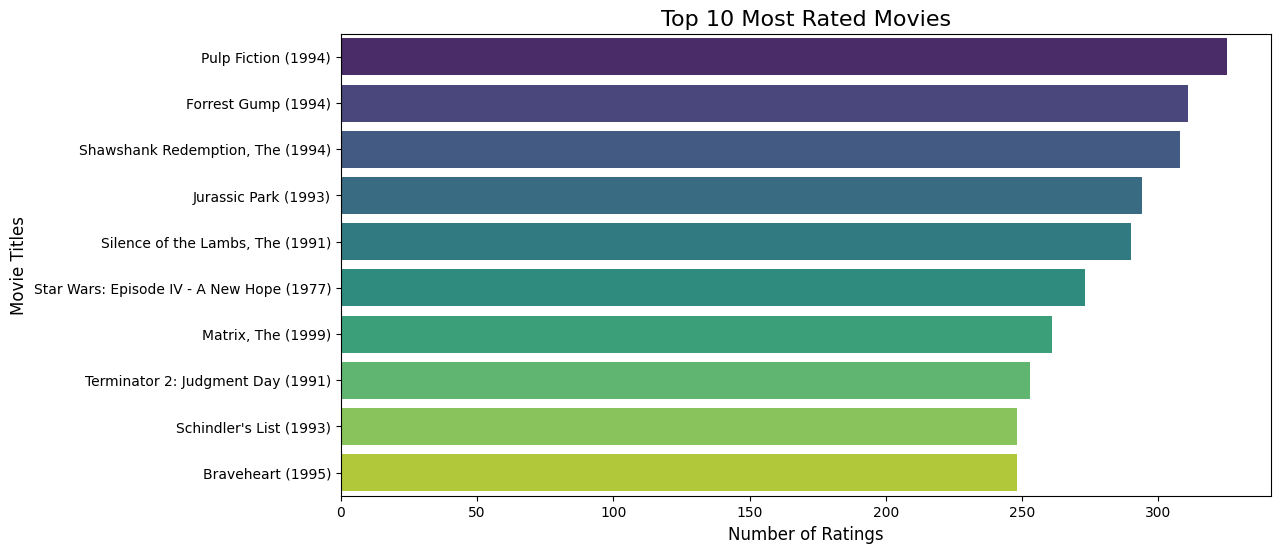

In [ ]:
# Calculate the number of ratings for each movie
movie_ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()
movie_ratings_count = movie_ratings_count.merge(movies, on='movieId')
movie_ratings_count = movie_ratings_count.sort_values(by='rating', ascending=False).head(10)

# Plot the most rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=movie_ratings_count, palette='viridis')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Titles', fontsize=12)
plt.show()


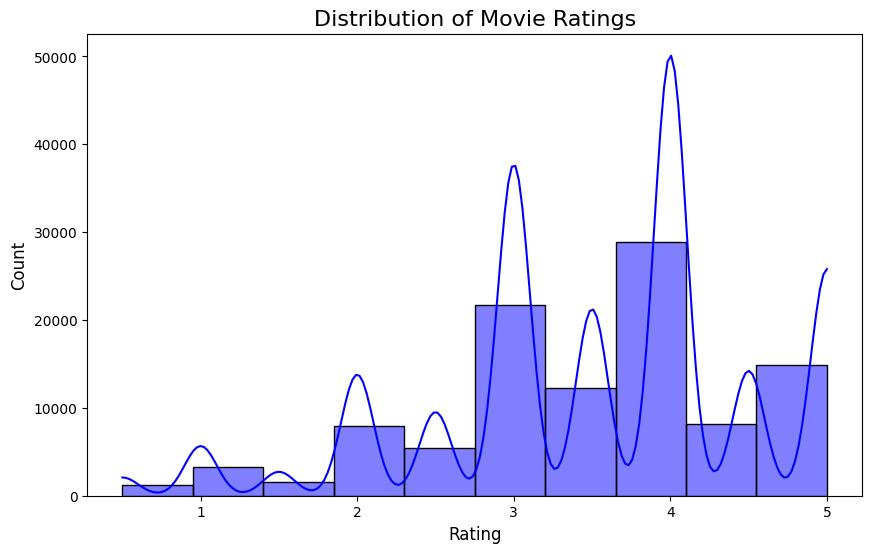

In [ ]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


<ipython-input-25-35fa35e4beef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='genres', data=avg_genre_ratings, palette='coolwarm')


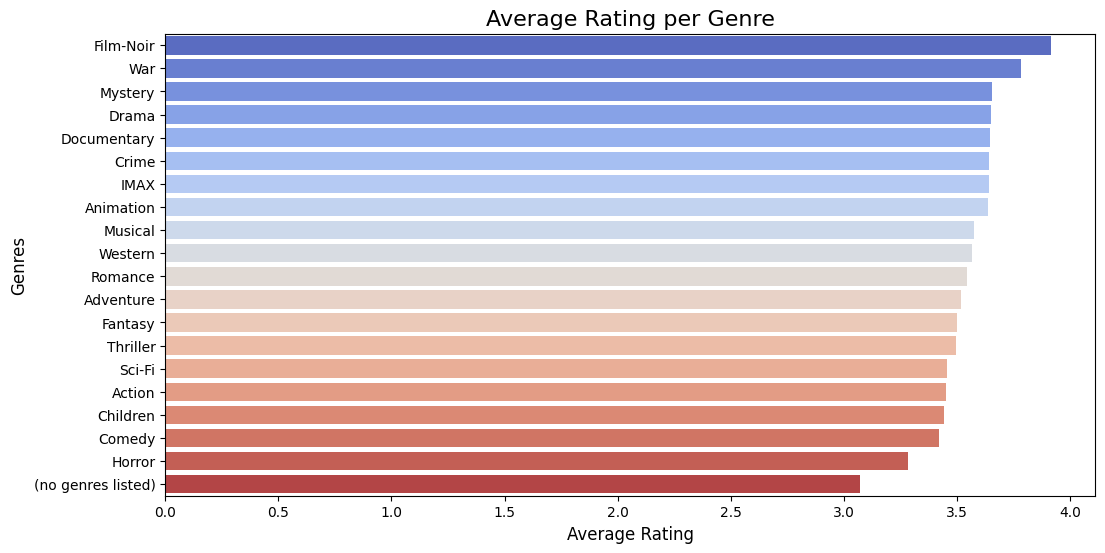

In [ ]:
# Explode genres into separate rows
movies_genres = movies.copy()
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

# Merge ratings with genres
genre_ratings = pd.merge(ratings, movies_genres, on='movieId')
avg_genre_ratings = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False).reset_index()

# Plot average ratings per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='genres', data=avg_genre_ratings, palette='coolwarm')
plt.title('Average Rating per Genre', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()

